In [ ]:
from STL.StlMl import STL_strategy
import Common.ApiClient as ac
import pandas as pd
import TradingStrategy as tStrategy
import numpy as np
from STL.StlMl import STL_strategy
Api_Key =''
Secret_Key=''
endpoint='https://paper-api.alpaca.markets'
client = ac.ApiClient(Api_Key,Secret_Key,endpoint)



Profit based on STL ML at last 5 months: 17.82%


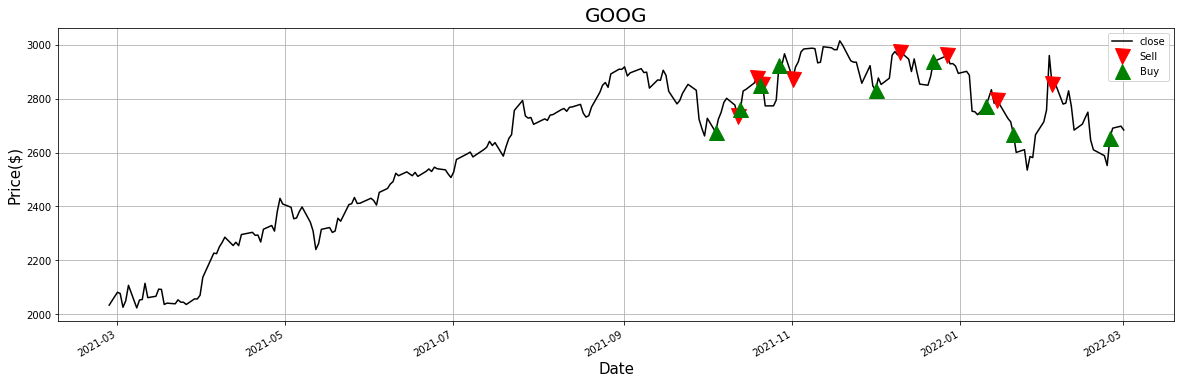

-1
Profit based on STL ML at last 5 months: -10.78%


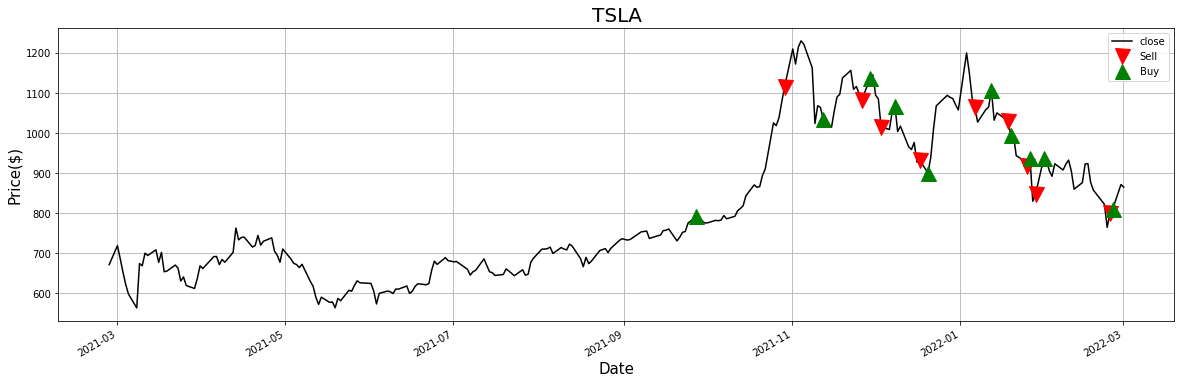

1
Profit based on STL ML at last 5 months: 20.10%


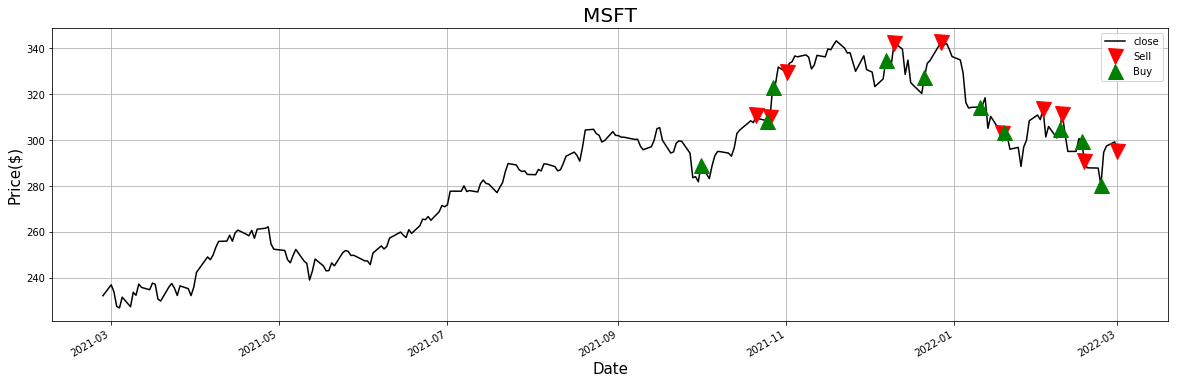

-1
Profit based on STL ML at last 5 months: 19.90%


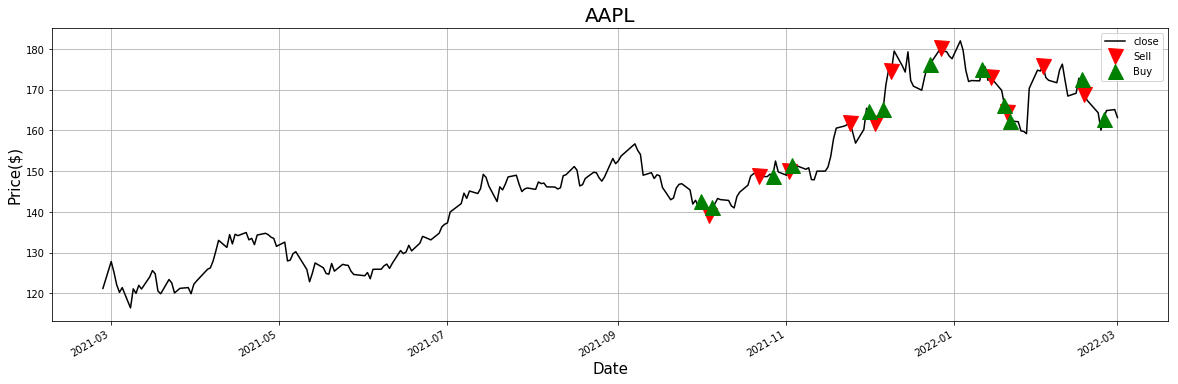

1
Profit based on STL ML at last 5 months: 21.98%


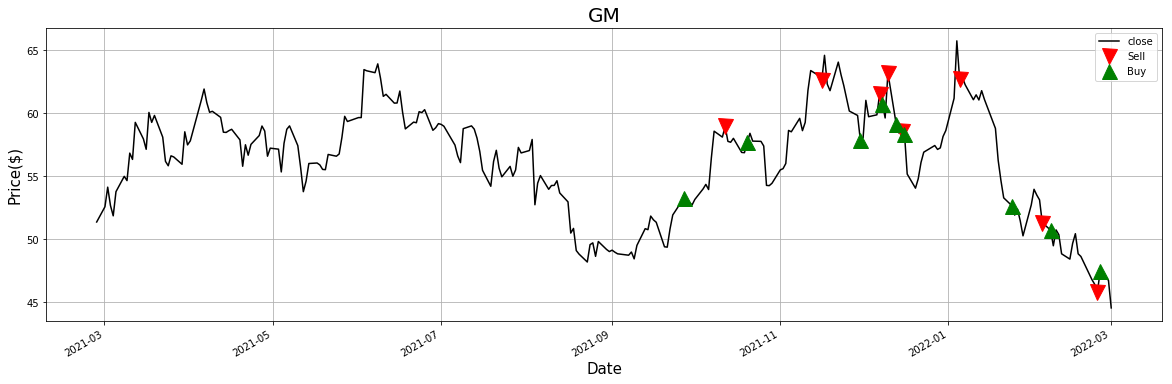

1
totl profit:69.01%


In [6]:
total = 0.0
from STL.StlMl import STL_strategy
for s,ticker in enumerate([ "GOOG","TSLA","MSFT","AAPL","GM"]):
    df= client.get_closing_price(ticker,255)
    #df = df.iloc[:-1]
    df.index=pd.to_datetime(df.index,utc=True)
    stl = STL_strategy(ticker,df,'close',5,2)  
    total += stl.backtest()
    print(stl.strategy())
print('totl profit:{:.2f}%'.format(total*100))

In [5]:
model = 'stl'
STOCKs=["GOOG","TSLA","MSFT","AAPL","GM"]
Strategies={}
STOCKs_money = {}
for stock in STOCKs:
    Strategies[stock]=tStrategy.TradingStrategy(stock,Api_Key,Secret_Key,model)
    


if model.lower() == 'stl': 
    for stock,tradingStrategy in Strategies.items():
        # train and prediction
        df = tradingStrategy.get_past255_closing_prices()
        df.index=pd.to_datetime(df.index,utc=True)
        tradingStrategy.trained_model = "stl"
        stocks_predict = STL_strategy(stock,df,'close',5,2).strategy()
        print(stock,stocks_predict)
        
        # Update current price and quantity
        tradingStrategy.get_positions_quantity()
        hold_count = tradingStrategy.EXISTING_QUANTITY         
        current_price = tradingStrategy.get_current_price()[0] 
        cash = float(tradingStrategy.client.get_account().buying_power) 
          
        #'''
        # Sell
        if hold_count!=0:
            loss = np.log(current_price/tradingStrategy.get_buy_price())
            print(stock,loss,hold_count)
            if stocks_predict ==-1 or loss <-0.06:
                print("sell")
                '''tradingStrategy.client.submit_order(stock,
                                    qty=hold_count,
                                    side="sell",
                                    type="market",
                                    time_in_force="day",
                                    order_class=None)'''
        # Buy    
        elif stocks_predict == 1 and hold_count==0:
            count = 0
            for position in tradingStrategy.client.list_positions():            
                if position.symbol not in STOCKs:
                    count +=1
                print("buy")
            # detecting how many stocks is empty.
            # dvidie to get even cash for each 
            '''hold_count = int(np.floor((cash/count)/current_price))
            tradingStrategy.client.submit_order(stock,
                                qty=hold_count,
                                side="buy",
                                type="market",
                                time_in_force="day",
                                order_class=None) '''
        #'''


GOOG -1
TSLA 1
TSLA 0.056471173016653387 49
MSFT -1
AAPL 1
AAPL 0.0007960565008122561 242
GM 1
GM -0.039203434684844315 843
